## 优化算法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### 梯度下降

In [2]:
def default_iter_func(i_iter, loss, grad):
    import time
    print('[%s] Iter %d: loss=%g, grad=%g.' % (time.ctime(), i_iter, loss, np.linalg.norm(grad)))
    
def default_plot_func(loss):
    plt.semilogy(loss);
    
    
def bgd(func, x0, alpha=0.1, tol=1e-6, max_iter = 100, iter_func = default_iter_func, iter_step = 1, plot_func = default_plot_func):
    assert(len(x0.shape) == 1)
    n_dim = x0.shape[0]
    x = x0
    old_loss = np.inf
    n_iter = 0
    loss_list = []
    while True:
        loss, grad = func(x)
        loss_list.append(loss)
        x -= alpha * grad
        n_iter += 1
        if n_iter % iter_step == 0:
            iter_func(n_iter, loss, grad)
        if abs(old_loss - loss) < tol or n_iter > max_iter:
            break
        old_loss = loss
    plot_func(loss_list)
    return loss, x

In [3]:
from scipy import linalg

def newton(func, x0, tol=1e-6, max_iter=10, iter_func = default_iter_func, iter_step = 1, plot_func = default_plot_func):
    assert(len(x0.shape) == 1)
    n_dim = x0.shape[0]
    x = x0
    old_loss = np.inf
    n_iter = 0
    loss_list = []
    while True:
        loss, grad, h = func(x)
        loss_list.append(loss)
        delta = linalg.solve(h, grad)
        x -= delta
        n_iter += 1
        if n_iter % iter_step == 0:
            iter_func(n_iter, loss, grad)
        if abs(old_loss - loss) < tol or n_iter > max_iter:
            break
        old_loss = loss
    plot_func(loss_list)
    
    return loss, x

[Sat Sep 24 13:58:55 2016] Iter 1: loss=49.0184, grad=24.9681.
[Sat Sep 24 13:58:55 2016] Iter 2: loss=11.6034, grad=8.30226.
[Sat Sep 24 13:58:55 2016] Iter 3: loss=5.94592, grad=5.45574.
[Sat Sep 24 13:58:55 2016] Iter 4: loss=3.39325, grad=3.94105.
[Sat Sep 24 13:58:55 2016] Iter 5: loss=2.03374, grad=2.97334.
[Sat Sep 24 13:58:55 2016] Iter 6: loss=1.2513, grad=2.29627.
[Sat Sep 24 13:58:55 2016] Iter 7: loss=0.781632, grad=1.79752.
[Sat Sep 24 13:58:55 2016] Iter 8: loss=0.492714, grad=1.4186.
[Sat Sep 24 13:58:55 2016] Iter 9: loss=0.312335, grad=1.12519.
[Sat Sep 24 13:58:55 2016] Iter 10: loss=0.198686, grad=0.895269.
[Sat Sep 24 13:58:55 2016] Iter 11: loss=0.126669, grad=0.713741.
[Sat Sep 24 13:58:55 2016] Iter 12: loss=0.080869, grad=0.569734.
[Sat Sep 24 13:58:55 2016] Iter 13: loss=0.051675, grad=0.455146.
[Sat Sep 24 13:58:55 2016] Iter 14: loss=0.0330388, grad=0.363789.
[Sat Sep 24 13:58:55 2016] Iter 15: loss=0.0211313, grad=0.290863.
[Sat Sep 24 13:58:55 2016] Iter 16

(1.1491846730822621e-06,
 array([  1.11442492e-04,   4.93797503e-05,   8.41337020e-05,
          3.36489670e-05,   1.89297613e-05,   9.97865533e-05,
          3.77192520e-05,   1.07721889e-04,   7.67968912e-05,
          1.10100277e-04,   8.70112587e-05,   1.12002353e-04,
          6.75152261e-05,   1.10562276e-04,   8.35150308e-05,
          2.04491076e-05,   1.58086312e-05,   4.94202991e-05,
          1.07008340e-04,   3.96608940e-05,   1.12676689e-04,
          9.27760294e-05,   9.54968471e-05,   1.09206749e-04,
          1.01540092e-04,   1.12263204e-04,   1.49603849e-05,
          1.11826202e-04,   2.07126161e-05,   5.68817131e-05,
          2.79849675e-05,   1.10095484e-04,   1.11965792e-04,
          2.18822400e-05,   1.30587100e-05,   4.89644876e-05,
          1.59034633e-05,   1.12632666e-04,   1.11837317e-04,
          1.10915768e-04,   7.36368241e-05,   2.88953612e-05,
          1.00492058e-04,   1.05610728e-04,   1.10749065e-04,
          1.00512106e-04,   8.65025269e-05,  

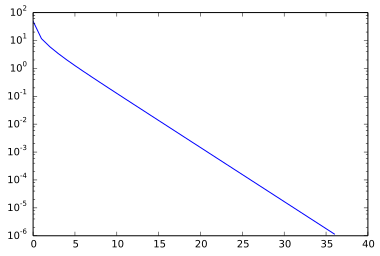

In [33]:
bgd(lambda x: (np.sum(x**4 +x**2), 4*(x**3) + 2*x ), np.random.rand(100), alpha=1e-1, max_iter=500)

[Sat Sep 24 13:57:11 2016] Iter 1: loss=50.2039, grad=24.8918.
[Sat Sep 24 13:57:11 2016] Iter 2: loss=9.386, grad=7.74404.
[Sat Sep 24 13:57:11 2016] Iter 3: loss=0.951703, grad=2.04667.
[Sat Sep 24 13:57:11 2016] Iter 4: loss=0.0123114, grad=0.222252.
[Sat Sep 24 13:57:11 2016] Iter 5: loss=2.61434e-07, grad=0.00102261.
[Sat Sep 24 13:57:11 2016] Iter 6: loss=1.35677e-20, grad=2.32961e-10.
[Sat Sep 24 13:57:11 2016] Iter 7: loss=0, grad=0.


(0.0, array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]))

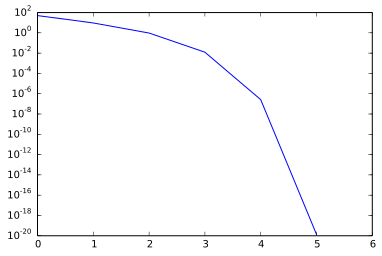

In [29]:
newton(lambda x: (np.sum(x**4) + np.sum(x**2), 4*(x**3) + 2*x, 12*np.diag(x**2) + 2*np.eye(100)), np.random.rand(100), max_iter=30, tol=1e-15)

In [50]:
def logistic_regression_loss(w, x, y):
    mu = 1/ np.log1p(np.exp(y * np.dot(x, w)) )
    loss = - np.sum(np.log1p( mu ))
    grad = np.dot(x, (mu - y))
    
    